# Mission 1. Netfilx and Code #

### 1. 넷플릭스의 한국작품의 수 ###

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import numpy as np

# 폰트 설정
font_path = 'C:\Windows\Fonts\malgun.ttf'
font = fm.FontProperties(fname=font_path)
font_name = font.get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

os.chdir('E:\data')
netflix_data = pd.read_csv('./data01/netflix_titles.csv')
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [14]:
korea_data = netflix_data[netflix_data['country'] == 'South Korea']
len(korea_data)

183

#### 한국작품의 수는 183개! ####

### 2. 가장 많은 작품이 올라간 국가는?(단일국가 기준) ###

In [17]:
country_data = netflix_data.groupby('country')['show_id'].count().reset_index(name='works')
country_data.sort_values('works', ascending=False, inplace=True)
country_data = country_data.reset_index(drop=True)
country_data

,country,works
0,United States,2555
1,India,923
2,United Kingdom,397
3,Japan,226
4,South Korea,183
...,...,...
676,"Indonesia, South Korea, Singapore",1
677,"Indonesia, United Kingdom",1
678,"Indonesia, United States",1
679,"Iran, France",1


#### 'United States'가 2555개로 1위! ####

# Mission 2. 가즈아! #

### 1. 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프 ###

In [74]:
bitcoin_data = pd.read_csv('./data01/BitCoin.csv')
bitcoin_data.sort_values('Date', ascending=True, inplace=True)
bitcoin_data

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
1605,1605,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
1574,1574,2013-01-06,128.81,129.78,127.20,129.30,7.521960e+06,1445800000
1544,1544,2013-01-07,97.51,97.66,86.30,88.05,5.759986e+06,1107130000
1513,1513,2013-01-08,106.21,108.00,103.01,104.00,6.348195e+06,1220190000
1482,1482,2013-01-09,135.14,145.81,134.81,138.34,8.179728e+06,1572230000
...,...,...,...,...,...,...,...,...
133,133,2017-12-05,1845.76,1856.15,1694.01,1724.24,7.409840e+08,30131100000
102,102,2017-12-06,2953.22,2997.26,2518.56,2659.63,2.569530e+09,48391200000
72,72,2017-12-07,2332.77,2423.71,2275.14,2398.84,1.117410e+09,38355900000
41,41,2017-12-08,3650.63,3949.92,3613.70,3884.71,2.219590e+09,60242100000


In [75]:
masking = (bitcoin_data['Date'] > '2016-05-31') & (bitcoin_data['Date'] <= '2017-06-30')

In [76]:
bitcoin_data_masking = bitcoin_data[masking].reset_index(drop=True)
bitcoin_data_masking

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,625,2016-06-01,431.86,431.86,426.34,429.11,3.404250e+07,6498830000
1,594,2016-06-02,386.59,386.63,372.39,376.52,4.924930e+07,5865740000
2,565,2016-06-03,400.52,411.91,395.78,407.71,9.121250e+07,6121400000
3,534,2016-06-04,424.28,424.53,422.73,423.41,5.909100e+07,6533260000
4,504,2016-06-05,447.94,461.38,447.07,459.60,7.279680e+07,6947800000
...,...,...,...,...,...,...,...,...
372,88,2017-06-26,2590.57,2615.25,2376.29,2478.45,1.663280e+09,42514000000
373,87,2017-06-27,2478.45,2552.45,2332.99,2552.45,1.489790e+09,40677900000
374,86,2017-06-28,2553.03,2603.98,2484.42,2574.79,1.183870e+09,41906700000
375,85,2017-06-29,2567.56,2588.83,2510.48,2539.32,9.499790e+08,42150300000


In [95]:
ma5 = bitcoin_data_masking['Open'].rolling(window=5).mean()
ma5 = ma5[4:]
ma5

4       418.238
5       446.786
6       503.552
7       538.454
8       574.900
         ...   
372    2666.942
373    2624.426
374    2593.564
375    2559.372
376    2545.770
Name: Open, Length: 373, dtype: float64

In [93]:
def term(date):
    ret = []
    for i in range(len(date)-4):
        days = list(date[i:i+5])
        ret.append(str(days[0]) + '~' + str(days[-1]))
    return ret
terms = term(bitcoin_data_masking['Date'])

In [98]:
datas = {'terms' : terms, '5-MA(Moving Average)' : ma5.values}
moving_avg_data = pd.DataFrame(datas)
moving_avg_data

,terms,5-MA(Moving Average)
0,2016-06-01~2016-06-05,418.238
1,2016-06-02~2016-06-06,446.786
2,2016-06-03~2016-06-07,503.552
3,2016-06-04~2016-06-08,538.454
4,2016-06-05~2016-06-09,574.900
...,...,...
368,2017-06-22~2017-06-26,2666.942
369,2017-06-23~2017-06-27,2624.426
370,2017-06-24~2017-06-28,2593.564
371,2017-06-25~2017-06-29,2559.372


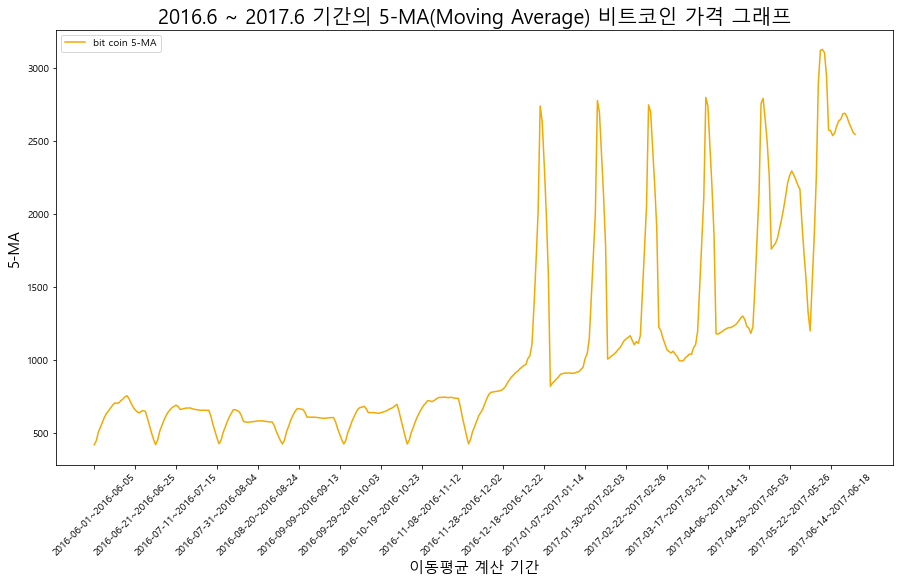

In [129]:
plt.figure(figsize=(15, 8))
plt.plot(moving_avg_data['terms'], moving_avg_data['5-MA(Moving Average)'], color='#f2a900', label='bit coin 5-MA')
plt.xticks(np.arange(0, 373, 20), rotation=45)
plt.legend(loc='upper left')
plt.xlabel('이동평균 계산 기간', fontsize=15)
plt.ylabel('5-MA', fontsize=15)
plt.title('2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프', fontsize=20)
plt.show()

### 2. 2016.6 ~ 2017.6 기간의 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그리기 ###

In [130]:
eth_data = pd.read_csv('./data01/ETH_day.csv')
eth_data.sort_values('Date', ascending=True, inplace=True)
eth_data

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1437,2016-05-09,ETHUSD,12.00,12.00,9.36,9.98,1317.90,12885.06
1436,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20
1435,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11
1434,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39
1433,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55
...,...,...,...,...,...,...,...,...
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44


In [131]:
masking = (eth_data['Date'] > '2016-05-31') & (eth_data['Date'] <= '2017-06-30')

In [132]:
eth_data_masking = eth_data[masking].reset_index(drop=True)
eth_data_masking

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2016-06-01,ETHUSD,14.18,14.35,13.54,13.95,6390.06,89027.81
1,2016-06-02,ETHUSD,13.95,14.13,13.82,13.90,942.85,13180.38
2,2016-06-03,ETHUSD,13.90,16.05,13.50,14.02,11426.53,157342.19
3,2016-06-04,ETHUSD,14.02,14.16,13.64,13.86,4330.50,59977.39
4,2016-06-05,ETHUSD,13.86,13.92,13.70,13.91,787.49,10869.67
...,...,...,...,...,...,...,...,...
390,2017-06-26,ETHUSD,278.73,299.90,210.00,253.00,249076.24,60950252.99
391,2017-06-27,ETHUSD,253.00,288.17,210.02,286.21,173179.40,42085473.60
392,2017-06-28,ETHUSD,286.21,324.95,260.49,317.59,184030.56,54573461.77
393,2017-06-29,ETHUSD,317.59,322.84,285.23,293.80,152271.32,46521350.06


In [135]:
ma5_eth = eth_data_masking['Open'].rolling(window=5).mean()
ma5_eth = ma5_eth[4:]
ma5_eth

4       13.982
5       13.928
6       13.970
7       14.090
8       14.188
        ...   
390    310.850
391    296.592
392    289.898
393    288.066
394    285.866
Name: Open, Length: 391, dtype: float64

In [136]:
terms_eth = term(eth_data_masking['Date'])
datas_eth = {'terms' : terms_eth, '5-MA(Moving Average)' : ma5_eth.values}
moving_avg_data_eth = pd.DataFrame(datas_eth)
moving_avg_data_eth

,terms,5-MA(Moving Average)
0,2016-06-01~2016-06-05,13.982
1,2016-06-02~2016-06-06,13.928
2,2016-06-03~2016-06-07,13.970
3,2016-06-04~2016-06-08,14.090
4,2016-06-05~2016-06-09,14.188
...,...,...
386,2017-06-22~2017-06-26,310.850
387,2017-06-23~2017-06-27,296.592
388,2017-06-24~2017-06-28,289.898
389,2017-06-25~2017-06-29,288.066


In [142]:
# 두 그래프를 동시에 그리기 위해 기간을 가장 최신일 기준으로 바꿔준다.
last_date_bc = list(map(lambda x:x.split('~')[1], terms))
last_date_eth = list(map(lambda x:x.split('~')[1], terms_eth))
moving_avg_last_bc = pd.DataFrame({'last_date' : last_date_bc, '5-MA(Moving Average)_bc' : ma5.values})
moving_avg_last_eth = pd.DataFrame({'last_date' : last_date_eth, '5-MA(Moving Average)_eth' : ma5_eth.values})
merge_data = pd.merge(moving_avg_last_bc, moving_avg_last_eth)
merge_data

,last_date,5-MA(Moving Average)_bc,5-MA(Moving Average)_eth
0,2016-06-05,418.238,13.982
1,2016-06-06,446.786,13.928
2,2016-06-07,503.552,13.970
3,2016-06-08,538.454,14.090
4,2016-06-09,574.900,14.188
...,...,...,...
368,2017-06-26,2666.942,310.850
369,2017-06-27,2624.426,296.592
370,2017-06-28,2593.564,289.898
371,2017-06-29,2559.372,288.066


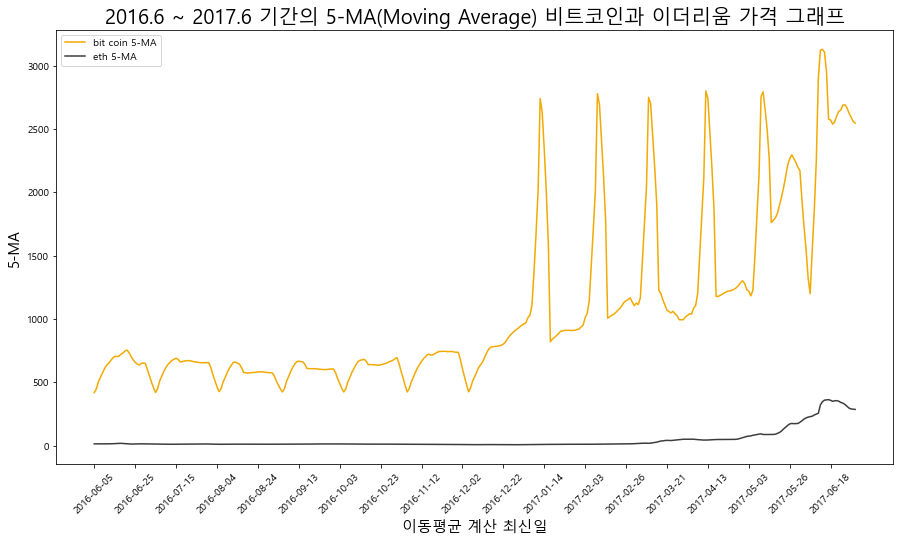

In [148]:
plt.figure(figsize=(15, 8))
plt.plot(merge_data['last_date'], merge_data['5-MA(Moving Average)_bc'], color='#f2a900', label='bit coin 5-MA')
plt.plot(merge_data['last_date'], merge_data['5-MA(Moving Average)_eth'], color='#3c3c3d', label='eth 5-MA')
plt.xticks(np.arange(0, 373, 20), rotation=45)
plt.legend(loc='upper left')
plt.xlabel('이동평균 계산 최신일', fontsize=15)
plt.ylabel('5-MA', fontsize=15)
plt.title('2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인과 이더리움 가격 그래프', fontsize=20)
plt.show()